<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-I:-Preprocessing-and-EDA" data-toc-modified-id="Part-I:-Preprocessing-and-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part I: Preprocessing and EDA</a></span><ul class="toc-item"><li><span><a href="#Analyze-Missingness" data-toc-modified-id="Analyze-Missingness-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analyze Missingness</a></span></li><li><span><a href="#Functions-for-EDA" data-toc-modified-id="Functions-for-EDA-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions for EDA</a></span></li><li><span><a href="#Problem-1:-Dataset-Import-&amp;-Cleaning" data-toc-modified-id="Problem-1:-Dataset-Import-&amp;-Cleaning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Problem 1: Dataset Import &amp; Cleaning</a></span></li><li><span><a href="#Problem-2:-Inventory-Management" data-toc-modified-id="Problem-2:-Inventory-Management-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Problem 2: Inventory Management</a></span></li><li><span><a href="#Problem-3:-Why-did-customers-make-returns?" data-toc-modified-id="Problem-3:-Why-did-customers-make-returns?-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Problem 3: Why did customers make returns?</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import random
import statsmodels.api as sm

import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from IPython.core.display import display, HTML

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
display(HTML("<style>.container { width:100% !important; }</style>"))

## Part I: Preprocessing and EDA
- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

Additional considerations:
- Change date string entries to datetime data type.
- Identify missing values. How to handle missing values?

In [2]:
# import Orders.csv
orders = pd.read_csv('../Data/Orders.csv')

In [3]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [5]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [6]:
# Rename columns to remove . from the name
orders.columns = orders.columns.str.replace('.','')

# Delete $ signs from Sales and Profit entries then convert to float
orders.Sales = orders.Sales.str.replace('$','').str.replace(',', '').astype('float64', copy=False)
orders.Profit = orders.Profit.str.replace('$', '').str.replace(',', '').astype('float64', copy=False)

# Convert OrderDate and ShipDate string entries to dates
orders.OrderDate = pd.to_datetime(orders.OrderDate)
orders.ShipDate = pd.to_datetime(orders.ShipDate)

orders.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,PostalCode,City,State,Country,Region,Market,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [7]:
orders.dtypes

RowID                     int64
OrderID                  object
OrderDate        datetime64[ns]
ShipDate         datetime64[ns]
ShipMode                 object
CustomerID               object
CustomerName             object
Segment                  object
PostalCode              float64
City                     object
State                    object
Country                  object
Region                   object
Market                   object
ProductID                object
Category                 object
SubCategory              object
ProductName              object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
ShippingCost            float64
OrderPriority            object
dtype: object

### Analyze Missingness

In [8]:
# Identify missing rows and columns
missingRows = orders[orders.isnull().any(axis=1)].index
missingCols = orders.columns[orders.isnull().any()]

print('The columns with missingness are: %s' % (list(missingCols)))
print('Number of rows with missingness are: %s' % (len(missingRows)))

The columns with missingness are: ['PostalCode']
Number of rows with missingness are: 41296


In [9]:
# for columns with missing values, what percent missing?
# Percentage of missing values in columns that are missing values:
def missingValPercent(col, df):
    val = df[col].isnull().sum()/df.shape[0]*100
    return round(val, 1)

missing_cols = pd.concat([pd.Series(missingCols), 
                          pd.Series([missingValPercent(ele, df = orders) 
                                     for ele in missingCols])], axis=1, keys=['column', 'percent_missing'])
pd.set_option('display.max_rows', None)
missing_cols

,column,percent_missing
0,PostalCode,80.5


### Functions for EDA

In [41]:
def categorical(df, col_name):
    """
    Arguments:
    - df: dataframe
    - col_name: name of column 
    Returns: 
    - count of missing values
    - frequency of each unique value
    - 
    """
    print("Missing Values Count: ", df[col_name].isna().sum())
    print("\nUnique values and frequency:")
    print(df[col_name].value_counts(sort = True))

In [42]:
def continuous(df, col_name):
    """
    Arguments:
    - df: dataframe
    - col_name: name of column 
    Returns:
    - count of missing values
    - statistical summary
    - distribution
    """
    print("Missing Values Count: ", df[col_name].isna().sum())
    print("\nStatistical summary:")
    print(df[col_name].describe())
    df[col_name].plot.hist()

In [43]:
cat = orders.select_dtypes(["object","category"])
cont = orders.select_dtypes(["float64","int64"]) 

In [44]:
cat.head(5)

,OrderID,ShipMode,CustomerID,CustomerName,Segment,City,State,Country,Region,Market,ProductID,Category,SubCategory,ProductName,OrderPriority
0,CA-2014-AB10015140-41954,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,High
1,IN-2014-JR162107-41675,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2014-CR127307-41929,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2014-KM1637548-41667,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2014-RH9495111-41948,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


In [45]:
cont.head(5)

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost
0,40098,73120.0,221.98,2,0.0,62.15,40.77
1,26341,NaN,3709.40,9,0.1,-288.77,923.63
2,25330,NaN,5175.17,9,0.1,919.97,915.49
3,13524,NaN,2892.51,5,0.1,-96.54,910.16
4,47221,NaN,2832.96,8,0.0,311.52,903.04


### Problem 2: Inventory Management
Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


Additional Considerations
- Identify outliers. How to deal with outliers?
- Does any of the features look skewed? Should we transform them using Box-Cox, log, sqrt?
- Which variables should we dummify?
- Quick correlation plots. Variables with high corrleation to prices should be prioritized as predictors
- How to deal with multi-collinearity?

In [102]:
# Create Month column and create a subset to see the seasonal trend
Year = pd.DataFrame(orders.OrderDate.dt.year)
Year.columns = ['Year']
Month = pd.DataFrame(orders.OrderDate.dt.month)
Month.columns = ['Month']
orders1 = pd.concat([orders,Year,Month],axis=1).copy()
#orders1 = orders1[['Year','Month','Category','SubCategory','ProductName']]
orders1 = orders1[['Year','Month','Category','Quantity']]
orders1.head()

,Year,Month,Category,Quantity
0,2014,11,Technology,2
1,2014,2,Furniture,9
2,2014,10,Technology,9
3,2014,1,Technology,5
4,2014,11,Technology,8


In [104]:
byCategory = orders1.groupby(['Month','Year','Category']).agg(count=pd.NamedAgg(column='Quantity', aggfunc='sum')).unstack().unstack()
byCategory.head()

count                                                   \
Category Furniture                Office Supplies                     
Year          2012 2013 2014 2015            2012  2013  2014  2015   
Month                                                                 
1              246  400  544  560             997  1108  1452  1923   
2              278  286  453  477             800   839  1279  1422   
3              319  457  582  740            1093  1316  1576  2298   
4              326  422  529  728            1233  1298  1652  2208   
5              409  481  737  857            1268  1872  2359  2671   

                                    
Category Technology                 
Year           2012 2013 2014 2015  
Month                               
1               220  366  417  639  
2               323  319  370  583  
3               333  464  528  684  
4               375  530  507  658  
5               490  568  712  772

In [105]:
# Identify missing rows and columns
missingRows = byCategory[byCategory.isnull().any(axis=1)].index
missingCols = byCategory.columns[byCategory.isnull().any()]

print('The columns with missingness are: %s' % (list(missingCols)))
print('Number of rows with missingness are: %s' % (len(missingRows)))

The columns with missingness are: []
Number of rows with missingness are: 0


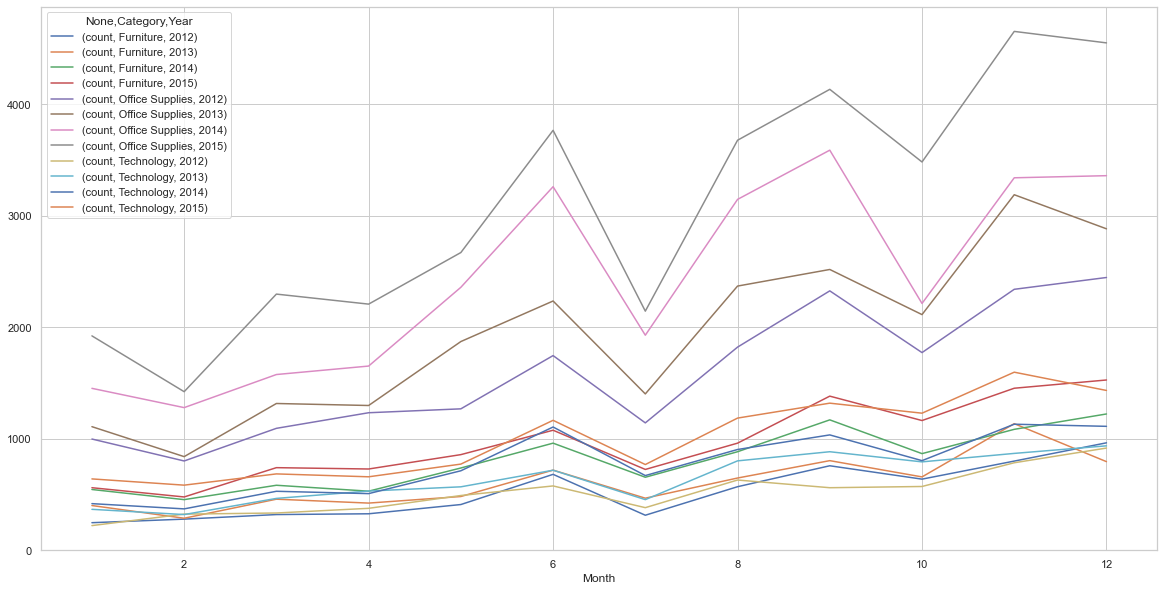

In [106]:
byCategory.plot()

In [150]:
# Preprocess data for linear regressions
idx = pd.IndexSlice

def stack_month(df,col):
    df_stack = df.loc[idx[:],idx[:,col,:]].stack()
    df_stack.columns = ['Count']
    df_stack['Month']=sorted(list(range(1,13))*4)
    df_stack = df_stack[['Month','Count']]
    df_stack.set_index('Month',inplace=True)
    return df_stack
    
"""
Furniture = byCategory.loc[idx[:],idx[:,'Furniture',:]].stack()
Furniture.columns = ['Count']
Furniture['Month']=sorted(list(range(1,13))*4)
Furniture = Furniture[['Month','Count']]
Furniture.set_index('Month',inplace=True)
"""
Furniture = stack_month(byCategory,'Furniture')
OfficeSupp = stack_month(byCategory,'Office Supplies')
Technology = stack_month(byCategory,'Technology')

In [ ]:
# Linear Regression


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?

	2. How many customer returned more than once? more than 5 times?

	3. Which regions are more likely to return orders?

	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.